In [1]:
import numpy as np 
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/uas-rfm/UAS_RFM.csv


In [2]:
data= pd.read_csv('../input/uas-rfm/UAS_RFM.csv')
data

,CardID,TrxDate,Amount
0,1000152,6/24/2021,"797,173.00"
1,1000158,4/7/2021,"912,660.00"
2,1000156,3/21/2021,"972,450.00"
3,1000115,5/20/2021,"599,196.00"
4,1000164,2/14/2021,"827,965.00"
...,...,...,...
194,1000113,5/1/2021,"249,526.00"
195,1000166,6/15/2021,"187,089.00"
196,1000132,2/19/2021,"890,693.00"
197,1000121,3/28/2021,"343,768.00"


In [3]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value

,index,0
0,CardID,0
1,TrxDate,0
2,Amount,0


In [4]:
data.duplicated().sum()

0

In [5]:
filtered_data=data[['CardID','TrxDate']].drop_duplicates()

<AxesSubplot:>

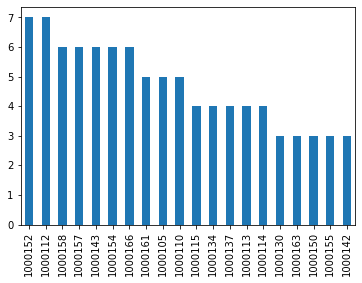

In [6]:
filtered_data.CardID.value_counts()[:20].plot(kind='bar')

<AxesSubplot:>

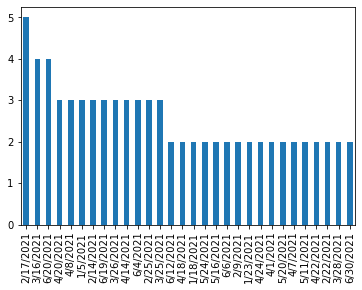

In [7]:
filtered_data.TrxDate.value_counts()[:30].plot(kind='bar')

In [8]:
data.shape

(199, 3)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CardID   199 non-null    int64 
 1   TrxDate  199 non-null    object
 2   Amount   199 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [10]:
data.isna().sum()

CardID     0
TrxDate    0
Amount     0
dtype: int64

In [11]:
data['TrxDate'] = pd.to_datetime(data['TrxDate'])

In [12]:
max_date = max(data['TrxDate'])
max_date

Timestamp('2021-06-30 00:00:00')

In [13]:
data['Diff'] = max_date - data['TrxDate']
data.head()

,CardID,TrxDate,Amount,Diff
0,1000152,2021-06-24,"797,173.00",6 days
1,1000158,2021-04-07,"912,660.00",84 days
2,1000156,2021-03-21,"972,450.00",101 days
3,1000115,2021-05-20,"599,196.00",41 days
4,1000164,2021-02-14,"827,965.00",136 days


In [14]:
type_counts = data['CardID'].value_counts()
CardID=pd.DataFrame(type_counts)
CardID.head()

,CardID
1000152,7
1000143,7
1000112,7
1000158,6
1000157,6


In [15]:
RFM = data.groupby('CardID')['Diff'].min().reset_index()
RFM.head()

,CardID,Diff
0,1000101,143 days
1,1000102,133 days
2,1000103,153 days
3,1000104,154 days
4,1000105,13 days


In [16]:
RFM['Diff'] = RFM['Diff'].dt.days
RFM.columns = ['CardID','Recency']
RFM.head()

,CardID,Recency
0,1000101,143
1,1000102,133
2,1000103,153
3,1000104,154
4,1000105,13


In [17]:
RFM_F = data.groupby('CardID')['TrxDate'].count().reset_index()
RFM_F.columns = ['CardID', 'Frequency']
RFM_F.head()



,CardID,Frequency
0,1000101,1
1,1000102,3
2,1000103,1
3,1000104,2
4,1000105,5


In [18]:
RFM_F.tail(5)

,CardID,Frequency
66,1000169,1
67,1000170,2
68,1000171,1
69,1000172,3
70,1000174,1


In [19]:
RFM_M = data.groupby('CardID')['Amount'].sum().reset_index()
RFM_M.columns = ['CardID','Amount']
RFM_M.head()

,CardID,Amount
0,1000101,"595,502.00"
1,1000102,"454,853.00607,435.00559,805.00"
2,1000103,"185,145.00"
3,1000104,"860,664.00861,520.00"
4,1000105,"708,611.00825,100.00681,646.00620,658.00446,36..."


In [20]:
RFM_M.tail()

,CardID,Amount
66,1000169,"892,006.00"
67,1000170,"320,453.0094,048.00"
68,1000171,"384,655.00"
69,1000172,"554,437.00904,739.00223,423.00"
70,1000174,"98,923.00"


In [21]:
RFM = RFM.merge(RFM_F,how='inner',on=['CardID'])
RFM =RFM.merge(RFM_M,how='inner',on=['CardID'])
RFM.head(25)

,CardID,Recency,Frequency,Amount
0,1000101,143,1,"595,502.00"
1,1000102,133,3,"454,853.00607,435.00559,805.00"
2,1000103,153,1,"185,145.00"
3,1000104,154,2,"860,664.00861,520.00"
4,1000105,13,5,"708,611.00825,100.00681,646.00620,658.00446,36..."
5,1000106,87,2,"699,502.00709,907.00"
6,1000107,71,3,"247,765.00578,797.00366,094.00"
7,1000108,5,3,"168,311.00247,583.00114,631.00"
8,1000109,37,2,"991,635.00477,881.00"
9,1000110,15,5,"831,039.0092,526.00194,691.00509,712.0092,089.00"


In [22]:
RFM.tail(25)

,CardID,Recency,Frequency,Amount
46,1000148,18,2,"593,756.00328,983.00"
47,1000149,25,2,"570,557.00507,890.00"
48,1000150,48,3,"213,736.00118,120.00803,771.00"
49,1000151,45,2,"910,616.00561,817.00"
50,1000152,6,7,"797,173.00564,080.00123,292.00417,309.00953,43..."
51,1000153,155,1,"95,578.00"
52,1000154,22,6,"437,923.00421,292.00671,221.0077,974.00413,724..."
53,1000155,68,3,"279,756.00467,629.00736,907.00"
54,1000156,77,2,"972,450.00997,056.00"
55,1000157,40,6,"764,789.00875,214.00419,326.00351,528.00695,94..."
